### Overview   
미국 거주자의 천식, 신장 질환, 당뇨, 피부암 여부 등 심장병 발생 가능성에 영향을 미칠 수 있는 정보를 통해 심장병 여부를 예측하는 Competition 입니다.

### 평가 지표
ROC AUC(Receiver Operating Characteristic - Area Under Curve) Score

### 변수 설명
- State : 거주하고 있는 미국의 주
- Sex : 성별
- GeneralHealth : 개인이 스스로 평가한 전반적인 건강 상태
- PhysicalHealthDays : 지난 30일 동안 신체적으로 건강하지 않았던 일수
- MentalHealthDays : 지난 30일 동안 정신적으로 건강하지 않았던 일수
- LastCheckupTime : 마지막으로 건강 검진을 받은 시
- PhysicalActivities : 신체 활동 또는 운동을 한 빈도
- SleepHours : 하루 평균 수면 시간
- RemovedTeeth : 영구 치아를 발치한 개수
- HadAngina : 협심증 경험 여부
- HadStroke : 뇌졸중 경험 여부
- HadAsthma : 천식 경험 여부
- HadSkinCancer : 피부암 경험 여부
- HadCOPD : 만성 폐쇄성 폐질환(COPD) 경험 여부
- HadDepressiveDisorder : 우울증 경험 여부
- HadKidneyDisease : 신장 질환 경험 여부
- HadArthritis : 관절염 경험 여부
- HadDiabetes : 당뇨병 경험 여부
- DeafOrHardOfHearing : 청각 장애 여부
- BlindOrVisionDifficulty : 시각 장애 여부
- DifficultyConcentrating : 집중에 어려움이 있는지 여부
- DifficultyWalking : 보행에 어려움이 있는지 여부
- DifficultyDressingBathing : 옷 입기나 목욕에 어려움이 있는지 여부
- DifficultyErrands : 혼자 외출하거나 볼일을 보는데 어려움이 있는지 여부
- SmokerStatus : 현재 흡연 상태
- ECigaretteUsage : 전자담배 사용 여부
- ChestScan : 흉부 CT나 X-ray를 촬영한 경험 여부
- RaceEthnicityCategory : 인종 및 민족 범주
- AgeCategory : 연령 범주
- HeightInMeters : 키 (미터 단위)
- WeightInKilograms : 체중 (킬로그램 단위)
- BMI : 체질량지수
- AlcoholDrinkers : 알코올을 섭취하는지 여부
- HIVTesting : HIV 검사를 받은 적이 있는지 여부
- FluVaxLast12 : 지난 12개월 내 독감 예방 접종 여부
- PneumoVaxEver : 폐렴구균 예방 접종 경험 여부
- TetanusLast10Tdap : 최근 10년 내 파상풍 예방접종(Tdap)을 받은 적이 있는지 여부
- HighRiskLastYear : 지난 1년 동안 고위험군으로 간주된 적이 있는지 여부
- CovidPos : 코로나19 양성 판정을 받은 적이 있는지 여부
- HadHeartAttack : 심장병 여부

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
display( train_df, test_df )

,ID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
0,346631,Montana,Male,Excellent,0.0,0.0,5 or more years ago,Yes,7.0,1 to 5,...,85.73,21.29,No,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,Yes,0
1,147983,Kansas,Female,Very good,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,77.11,NaN,Yes,No,Yes,No,"Yes, received Tdap",No,No,0
2,63785,Indiana,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,...,89.81,31.96,Yes,NaN,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
3,43439,Virginia,Female,Very good,1.0,1.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,68.04,24.96,Yes,No,No,Yes,"Yes, received Tdap",No,No,0
4,285789,Ohio,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,81.65,27.37,Yes,Yes,Yes,No,"Yes, received Tdap",No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353648,78018,New Jersey,Female,Very good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
353649,167103,Maryland,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,52.16,19.14,Yes,Yes,Yes,No,"Yes, received Tdap",No,No,0
353650,53730,Ohio,Male,Good,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,...,118.84,41.03,No,NaN,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,1
353651,182288,Alabama,Male,Poor,30.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,"6 or more, but not all",...,68.04,24.96,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,1


,ID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,425295,Massachusetts,Male,Good,5.0,0.0,Within past 5 years (2 years but less than 5 y...,Yes,7.0,None of them,...,NaN,83.91,NaN,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,No
1,169359,Louisiana,Male,Good,0.0,21.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,...,1.75,65.77,21.41,Yes,Yes,No,Yes,"Yes, received Tdap",No,No
2,69449,New Hampshire,Male,Good,4.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.88,92.08,26.06,No,No,Yes,NaN,"Yes, received tetanus shot but not sure what type",No,No
3,10517,Ohio,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,...,1.70,72.57,25.06,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,Yes
4,62046,Indiana,Male,Good,0.0,20.0,Within past year (anytime less than 12 months ...,No,5.0,NaN,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88409,228743,Wyoming,Female,Very good,3.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,...,1.70,95.25,32.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88410,259973,New York,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,...,1.57,NaN,NaN,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
88411,218347,Indiana,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,...,1.91,NaN,NaN,No,NaN,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
88412,373556,Rhode Island,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,"6 or more, but not all",...,1.70,68.04,23.49,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353653 entries, 0 to 353652
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         353653 non-null  int64  
 1   State                      353653 non-null  object 
 2   Sex                        353653 non-null  object 
 3   GeneralHealth              352798 non-null  object 
 4   PhysicalHealthDays         345169 non-null  float64
 5   MentalHealthDays           346556 non-null  float64
 6   LastCheckupTime            347270 non-null  object 
 7   PhysicalActivities         352859 non-null  object 
 8   SleepHours                 349494 non-null  float64
 9   RemovedTeeth               344795 non-null  object 
 10  HadAngina                  350785 non-null  object 
 11  HadStroke                  352757 non-null  object 
 12  HadAsthma                  352484 non-null  object 
 13  HadSkinCancer              35

In [3]:
missing_percentage = train_df.isnull().mean() * 100

# 결과를 데이터프레임으로 정리
missing_data = pd.DataFrame({
    'Column': train_df.columns,
    'MissingPercentage': missing_percentage
}).sort_values(by='MissingPercentage', ascending=False)

# 결측치 비율이 있는 열만 표시
missing_data = missing_data[missing_data['MissingPercentage'] > 0]

print(missing_data)

                                              Column  MissingPercentage
TetanusLast10Tdap                  TetanusLast10Tdap          18.448592
PneumoVaxEver                          PneumoVaxEver          17.226208
HIVTesting                                HIVTesting          14.780307
ChestScan                                  ChestScan          12.478899
CovidPos                                    CovidPos          11.322963
HighRiskLastYear                    HighRiskLastYear          11.300060
BMI                                              BMI          10.848204
FluVaxLast12                            FluVaxLast12          10.494751
AlcoholDrinkers                      AlcoholDrinkers          10.356762
WeightInKilograms                  WeightInKilograms           9.355498
ECigaretteUsage                      ECigaretteUsage           7.921890
SmokerStatus                            SmokerStatus           7.876647
HeightInMeters                        HeightInMeters           6

In [4]:
# 결측치 처리를 할 때, 결측치 비율이 적은 것부터 처리하는 것이 일반적으로 더 효율적입니다. 
# 적은 결측치를 먼저 처리함으로써 데이터 손실 최소화

In [5]:
# HadDiabetes : 당뇨병 경험 여부
# 임신 중에 발생하는 호르몬 변화 등 생리학적 변화와 연관이 있으며, 출산 후에는 대부분 정상혈당으로 돌아옵니
# Yes, but only during pregnancy (female)' 를 'No'로 처리 NA는 No 로 처리
train_df['HadDiabetes'].value_counts(dropna = False)
train_df['HadDiabetes'].fillna(train_df['HadDiabetes'].mode()[0], inplace=True)
train_df['HadDiabetes'] = train_df['HadDiabetes'].replace('Yes, but only during pregnancy (female)', 'No')
train_df['HadDiabetes'].value_counts()

HadDiabetes
No                                         297213
Yes                                         48289
No, pre-diabetes or borderline diabetes      8151
Name: count, dtype: int64

In [6]:
# PhysicalActivities : 신체 활동 또는 운동을 한 빈도
# 최빈값
train_df['PhysicalActivities'].value_counts(dropna = False)
train_df['PhysicalActivities'].fillna(train_df['PhysicalActivities'].mode()[0], inplace=True)

In [7]:
# GeneralHealth : 개인이 스스로 평가한 전반적인 건강 상태 
# 최빈값
train_df['GeneralHealth'].value_counts(dropna = False)
train_df['GeneralHealth'].fillna(train_df['GeneralHealth'].mode()[0], inplace=True)

In [8]:
# HadStroke : 뇌졸중 경험 여부
# 최빈값
train_df['HadStroke'].value_counts(dropna = False)
train_df['HadStroke'].fillna(train_df['HadStroke'].mode()[0], inplace=True)

In [9]:
# HadAsthma : 천식 경험 여부
# 최빈값
train_df['HadAsthma'].value_counts(dropna = False)
train_df['HadAsthma'].fillna(train_df['HadAsthma'].mode()[0], inplace=True)

In [10]:
# HadKidneyDisease : 신장 질환 경험 여부
# 최빈값
train_df['HadKidneyDisease'].value_counts(dropna = False)
train_df['HadKidneyDisease'].fillna(train_df['HadAsthma'].mode()[0], inplace=True)

In [11]:
# HadCOPD : 만성 폐쇄성 폐질환(COPD) 경험 여부
# 최빈값
train_df['HadCOPD'].value_counts(dropna = False)
train_df['HadCOPD'].fillna(train_df['HadCOPD'].mode()[0], inplace=True)

In [12]:
# HadArthritis : 관절염 경험 여부
# 최빈값
train_df['HadArthritis'].value_counts(dropna = False)
train_df['HadArthritis'].fillna(train_df['HadArthritis'].mode()[0], inplace=True)

In [13]:
# HadDepressiveDisorder : 우울증 경험 여부
# 최빈값
train_df['HadDepressiveDisorder'].value_counts(dropna = False)
train_df['HadDepressiveDisorder'].fillna(train_df['HadDepressiveDisorder'].mode()[0], inplace=True)

In [14]:
# HadSkinCancer : 피부암 경험 여부
# 최빈값
train_df['HadSkinCancer'].value_counts(dropna = False)
train_df['HadSkinCancer'].fillna(train_df['HadSkinCancer'].mode()[0], inplace=True)

In [15]:
# HadAngina : 협심증 경험 여부
# 최빈값
train_df['HadAngina'].value_counts(dropna = False)
train_df['HadAngina'].fillna(train_df['HadSkinCancer'].mode()[0], inplace=True)

In [16]:
# SleepHours : 하루 평균 수면 시간
# 최빈값
train_df['SleepHours'].value_counts(dropna = False)
train_df['SleepHours'].fillna(train_df['SleepHours'].mode()[0], inplace=True)

In [17]:
# LastCheckupTime : 마지막으로 건강 검진을 받은 시
# 최빈값
train_df['LastCheckupTime'].value_counts(dropna = False)
train_df['LastCheckupTime'].fillna(train_df['LastCheckupTime'].mode()[0], inplace=True)

In [18]:
# PhysicalHealthDays : 지난 30일 동안 신체적으로 건강하지 않았던 일수
# 최빈값
train_df['PhysicalHealthDays'].value_counts(dropna = False)  
train_df['PhysicalHealthDays'].fillna(train_df['PhysicalHealthDays'].mode()[0], inplace=True)


In [19]:
# MentalHealthDays : 지난 30일 동안 정신적으로 건강하지 않았던 일수
# 최빈값
train_df['MentalHealthDays'].value_counts(dropna = False)  
train_df['MentalHealthDays'].fillna(train_df['MentalHealthDays'].mode()[0], inplace=True)

In [20]:
# # AgeCategory : 연령 범주 -> 비율에 따른 랜덤 샘플링 대체
train_df['AgeCategory'].value_counts(dropna = False)
nan_count = train_df['AgeCategory'].isna().sum()

# 각 연령 범주의 비율 계산
proportions = train_df['AgeCategory'].value_counts(normalize=True)

# 결측치 채우기
values = proportions.index  # 비결측치 값들
probabilities = proportions.values  # 각 값의 비율
random_samples = np.random.choice(values, size=nan_count, p=probabilities)

# 결측치 위치에 무작위 샘플 대체
train_df.loc[train_df['AgeCategory'].isna(), 'AgeCategory'] = random_samples
train_df['AgeCategory'].value_counts(dropna = False)

AgeCategory
Age 65 to 69       38126
Age 60 to 64       36202
Age 70 to 74       35179
Age 55 to 59       29938
Age 80 or older    29089
Age 50 to 54       27307
Age 75 to 79       26270
Age 40 to 44       24404
Age 35 to 39       23203
Age 45 to 49       23140
Age 18 to 24       21919
Age 30 to 34       20980
Age 25 to 29       17896
Name: count, dtype: int64

In [21]:
# RemovedTeeth : 영구 치아를 발치한 개수
# 최빈값
train_df['RemovedTeeth'].value_counts(dropna = False)
train_df['RemovedTeeth'].fillna(train_df['RemovedTeeth'].mode()[0], inplace=True)

In [22]:
# RaceEthnicityCategory : 인종 및 민족 범주
# 최빈값
train_df['RaceEthnicityCategory'].value_counts(dropna = False)
train_df['RaceEthnicityCategory'].fillna(train_df['RaceEthnicityCategory'].mode()[0], inplace=True)

In [23]:
#DeafOrHardOfHearing : 청각 장애 여부 
# 최빈값
train_df['DeafOrHardOfHearing'].value_counts(dropna = False)
train_df['DeafOrHardOfHearing'].fillna(train_df['DeafOrHardOfHearing'].mode()[0], inplace=True)

In [24]:
# BlindOrVisionDifficulty      
# 최빈값
train_df['BlindOrVisionDifficulty'].value_counts(dropna = False)
train_df['BlindOrVisionDifficulty'].fillna(train_df['BlindOrVisionDifficulty'].mode()[0], inplace=True)

In [25]:
# - DifficultyDressingBathing : 옷 입기나 목욕에 어려움이 있는지 여부
# 최빈값
train_df['DifficultyDressingBathing'].value_counts(dropna = False)
train_df['DifficultyDressingBathing'].fillna(train_df['DifficultyDressingBathing'].mode()[0], inplace=True)

In [26]:
# - DifficultyWalking : 보행에 어려움이 있는지 여부
# 최빈값
train_df['DifficultyWalking'].value_counts(dropna = False)
train_df['DifficultyWalking'].fillna(train_df['DifficultyWalking'].mode()[0], inplace=True)

In [27]:
#  DifficultyConcentrating : 집중에 어려움이 있는지 여부
# 최빈값
train_df['DifficultyConcentrating'].value_counts(dropna = False)
train_df['DifficultyConcentrating'].fillna(train_df['DifficultyConcentrating'].mode()[0], inplace=True)

In [28]:
# - DifficultyErrands : 혼자 외출하거나 볼일을 보는데 어려움이 있는지 여부
# 최빈값
train_df['DifficultyErrands'].value_counts(dropna = False)
train_df['DifficultyErrands'].fillna(train_df['DifficultyErrands'].mode()[0], inplace=True)

In [29]:
#  HeightInMeters : 키 (미터 단위)
# 성별별로 평균값
train_df['HeightInMeters'].value_counts(dropna = False)
train_df['HeightInMeters'] = train_df.groupby('Sex')['HeightInMeters'].apply(lambda x: x.fillna(x.mean()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\frame.py", line 11610, in _reindex_for_setitem
    reindexed_value = value.reindex(index)._values
                      ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\series.py", line 4918, in reindex
    return super().reindex(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5360, in reindex
    return self._reindex_axes(
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5375, in _reindex_axes
    new_index, indexer = ax.reindex(
                         ^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\indexes\base.py", line 4279, in reindex
    target = self._wrap_reindex_result(target, indexer, preserve_names)
             ^^^^^^^^^^^^^^^^^

In [30]:
#  SmokerStatus : 현재 흡연 상태
# 최빈값
train_df['SmokerStatus'].value_counts(dropna = False)
train_df['SmokerStatus'].fillna(train_df['SmokerStatus'].mode()[0], inplace=True)

In [31]:
# - ECigaretteUsage : 전자담배 사용 여부
# 최빈값
train_df['ECigaretteUsage'].value_counts(dropna = False)
train_df['ECigaretteUsage'].fillna(train_df['ECigaretteUsage'].mode()[0], inplace=True)

In [32]:
# - WeightInKilograms : 체중 (킬로그램 단위)
# 성별별로 평균값
train_df['WeightInKilograms'].value_counts(dropna = False)
train_df['WeightInKilograms'] = train_df.groupby('Sex')['WeightInKilograms'].apply(lambda x: x.fillna(x.mean()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\frame.py", line 11610, in _reindex_for_setitem
    reindexed_value = value.reindex(index)._values
                      ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\series.py", line 4918, in reindex
    return super().reindex(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5360, in reindex
    return self._reindex_axes(
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5375, in _reindex_axes
    new_index, indexer = ax.reindex(
                         ^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\indexes\base.py", line 4279, in reindex
    target = self._wrap_reindex_result(target, indexer, preserve_names)
             ^^^^^^^^^^^^^^^^^

In [33]:
 # AlcoholDrinkers : 알코올을 섭취하는지 여부
# 최빈값
train_df['AlcoholDrinkers'].value_counts(dropna = False)
train_df['AlcoholDrinkers'].fillna(train_df['AlcoholDrinkers'].mode()[0], inplace=True)

In [34]:
# FluVaxLast12 : 지난 12개월 내 독감 예방 접종 여부
# 최빈값
train_df['FluVaxLast12'].value_counts(dropna = False)
train_df['FluVaxLast12'].fillna(train_df['FluVaxLast12'].mode()[0], inplace=True)

In [35]:
# BMI : 체질량지수
# 성별별로 평균값
train_df['BMI'].value_counts(dropna = False)
train_df['BMI'] = train_df.groupby('Sex')['BMI'].apply(lambda x: x.fillna(x.mean()))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\frame.py", line 11610, in _reindex_for_setitem
    reindexed_value = value.reindex(index)._values
                      ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\series.py", line 4918, in reindex
    return super().reindex(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5360, in reindex
    return self._reindex_axes(
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\generic.py", line 5375, in _reindex_axes
    new_index, indexer = ax.reindex(
                         ^^^^^^^^^^^
  File "c:\Users\82109\Documents\anaconda_new\Lib\site-packages\pandas\core\indexes\base.py", line 4279, in reindex
    target = self._wrap_reindex_result(target, indexer, preserve_names)
             ^^^^^^^^^^^^^^^^^

In [36]:
# HighRiskLastYear : 지난 1년 동안 고위험군으로 간주된 적이 있는지 여부
# 최빈값
train_df['HighRiskLastYear'].value_counts(dropna = False)
train_df['HighRiskLastYear'].fillna(train_df['HighRiskLastYear'].mode()[0], inplace=True)

In [37]:
# CovidPos : 코로나19 양성 판정을 받은 적이 있는지 여부
# 'Tested positive using home test without a health professional'  : yes로 처리
train_df['CovidPos'].value_counts(dropna = False)
train_df['CovidPos'] = train_df['CovidPos'].replace('Tested positive using home test without a health professional', 'Yes')
train_df['CovidPos'].fillna(train_df['CovidPos'].mode()[0], inplace=True)
train_df['CovidPos'].value_counts(dropna = False)

CovidPos
No     254615
Yes     99038
Name: count, dtype: int64

In [38]:
# ChestScan : 흉부 CT나 X-ray를 촬영한 경험 여부
# 최빈값
train_df['ChestScan'].value_counts(dropna = False)
train_df['ChestScan'].fillna(train_df['ChestScan'].mode()[0], inplace=True)
train_df['ChestScan'].value_counts()

ChestScan
No     222180
Yes    131473
Name: count, dtype: int64

In [39]:
# HIVTesting : HIV 검사를 받은 적이 있는지 여부
# 최빈값
train_df['HIVTesting'].value_counts(dropna = False)
train_df['HIVTesting'].fillna(train_df['HIVTesting'].mode()[0], inplace=True)
train_df['HIVTesting'].value_counts()

HIVTesting
No     250863
Yes    102790
Name: count, dtype: int64

In [40]:
# PneumoVaxEver : 폐렴구균 예방 접종 경험 여부
# 최빈값
train_df['PneumoVaxEver'].value_counts(dropna = False)
train_df['PneumoVaxEver'].fillna(train_df['PneumoVaxEver'].mode()[0], inplace=True)
train_df['PneumoVaxEver'].value_counts()

PneumoVaxEver
No     232736
Yes    120917
Name: count, dtype: int64

In [41]:
# TetanusLast10Tdap : 최근 10년 내 파상풍 예방접종(Tdap)을 받은 적이 있는지 여부
# 아래처럼 처리
train_df['TetanusLast10Tdap'].value_counts(dropna = False)
train_df['TetanusLast10Tdap'] = train_df['TetanusLast10Tdap'].replace({
    'No, did not receive any tetanus shot in the past 10 years' : 'NO',
    'Yes, received tetanus shot but not sure what type': 'Unknown',
    'Yes, received Tdap': 'Tdap',
    'Yes, received tetanus shot, but not Tdap' : 'Not_Tdap'
})
train_df['TetanusLast10Tdap'].fillna('Unknown', inplace=True)
train_df['TetanusLast10Tdap'].value_counts(dropna = False)

TetanusLast10Tdap
Unknown     155696
NO           96338
Tdap         79653
Not_Tdap     21966
Name: count, dtype: int64

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353653 entries, 0 to 353652
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         353653 non-null  int64  
 1   State                      353653 non-null  object 
 2   Sex                        353653 non-null  object 
 3   GeneralHealth              353653 non-null  object 
 4   PhysicalHealthDays         353653 non-null  float64
 5   MentalHealthDays           353653 non-null  float64
 6   LastCheckupTime            353653 non-null  object 
 7   PhysicalActivities         353653 non-null  object 
 8   SleepHours                 353653 non-null  float64
 9   RemovedTeeth               353653 non-null  object 
 10  HadAngina                  353653 non-null  object 
 11  HadStroke                  353653 non-null  object 
 12  HadAsthma                  353653 non-null  object 
 13  HadSkinCancer              35

In [43]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

In [44]:
categorical_columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [45]:
numerical_columns.drop()

TypeError: Index.drop() missing 1 required positional argument: 'labels'

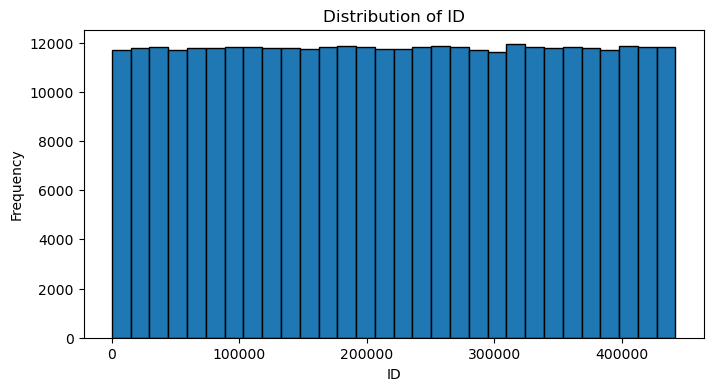

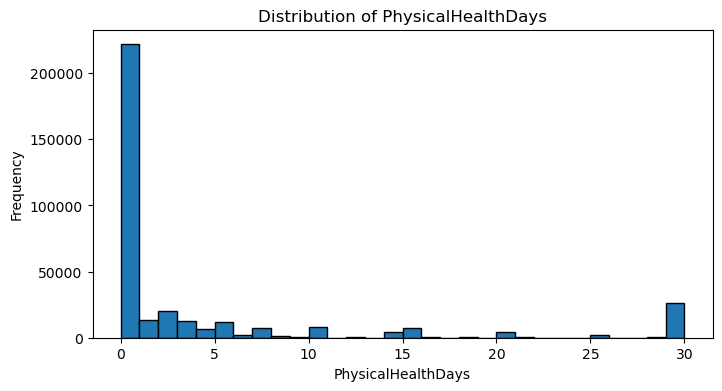

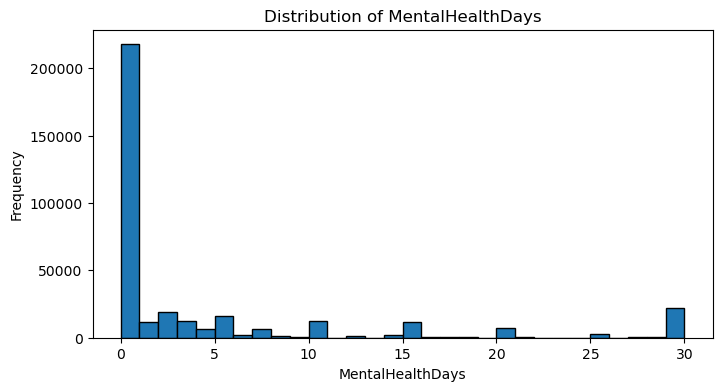

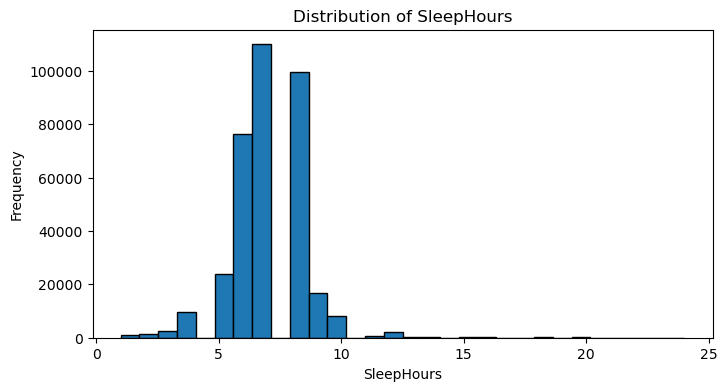

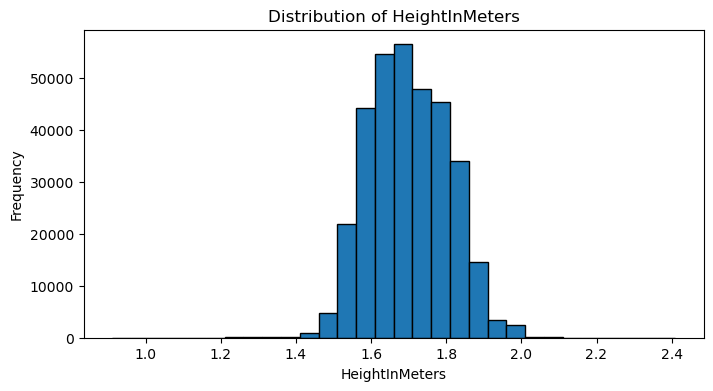

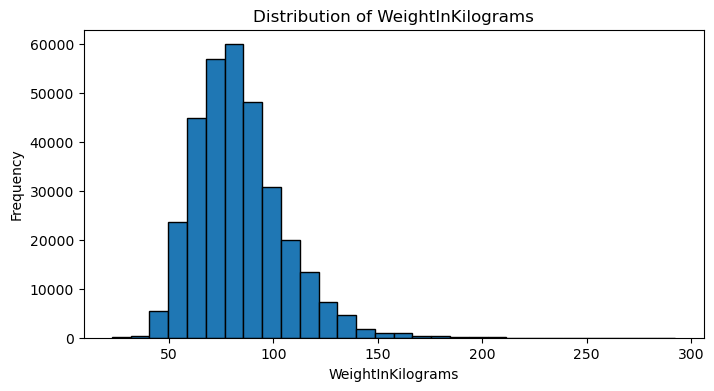

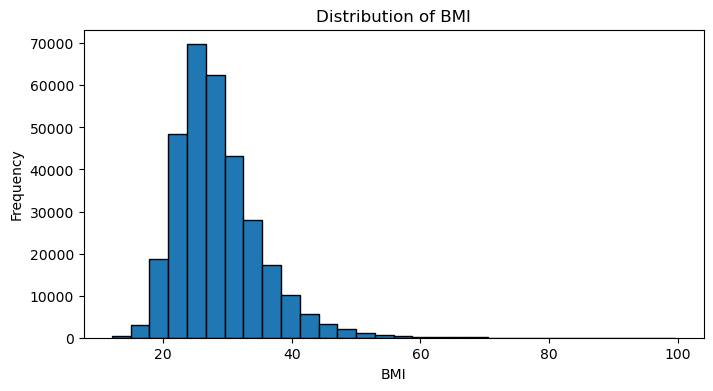

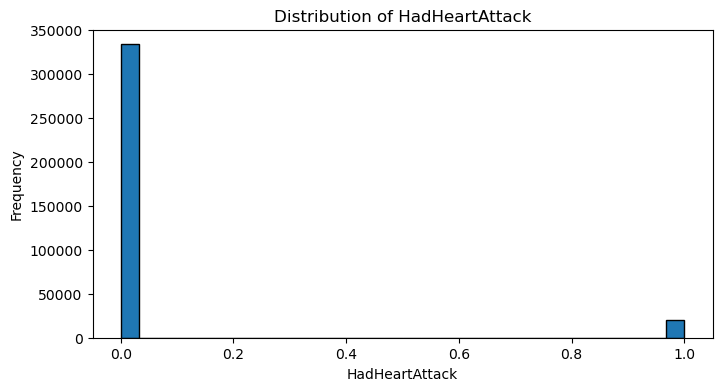

In [46]:
import matplotlib.pyplot as plt

# 수치형 변수 분포 보기
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(train_df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [47]:
import numpy as np

# 사분위수(IQR) 방법을 사용하여 이상치를 평균값으로 대체
def replace_outliers_with_mean(train_df, columns):
    for col in columns:
        # 1사분위수(Q1)와 3사분위수(Q3) 계산
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1  # IQR 계산

        # 이상치 기준 설정 (Q1 - 1.5*IQR 이하 또는 Q3 + 1.5*IQR 이상)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 평균값 계산
        mean_value = train_df[col].mean()

        # 이상치를 평균값으로 대체
        train_df[col] = train_df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# 이상치 처리할 열 리스트
numerical_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 
                     'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack']

# 이상치 처리 함수 호출
replace_outliers_with_mean(train_df, numerical_columns)

In [2]:
from sklearn.impute import SimpleImputer

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

## 모델링